In [3]:
import pandas
import numpy
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os
import cv2
import random
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import math

In [104]:
labels = []
all2test = []
count = 0
for filename in os.listdir("images"):
    path = os.path.join("images", filename)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #if count < 16000:
        #count += 1
        #continue
    if count < 24000:
        labels.append(0)
    else:
        labels.append(1)
    all2test.append(img)
    count += 1

images = numpy.array(all2test)
#print(len(images[0]))
newLabels = numpy.array(labels)

images_normalized = images / 255.0

images_flattened = images_normalized.reshape(images.shape[0], -1)

images_tensor = torch.tensor(images_flattened, dtype=torch.float32)
labels_tensor = torch.tensor(newLabels, dtype=torch.long)

In [105]:
dataset = TensorDataset(images_tensor, labels_tensor)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [116]:
'''model = nn.Sequential(nn.Linear(1200, 600),
                      nn.ReLU(),
                      nn.Linear(600, 300),
                      nn.ReLU(),
                      nn.Linear(300, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 32),
                      nn.ReLU(),
                      nn.Linear(32, 16),
                      nn.ReLU(),
                      nn.Linear(16, 1),
                      nn.Sigmoid())'''
'''
model = nn.Sequential(nn.Linear(1200, 600),
                      nn.ReLU(),
                      nn.Linear(600, 300),
                      nn.ReLU(),
                      nn.Linear(300, 150),
                      nn.ReLU(),
                      nn.Linear(150, 75),
                      nn.ReLU(),
                      nn.Linear(75, 38),
                      nn.ReLU(),
                      nn.Linear(38, 19),
                      nn.ReLU(),
                      nn.Linear(19, 9),
                      nn.Linear(9, 4),
                      nn.ReLU(),
                      nn.Linear(4, 2),
                      nn.ReLU(),
                      nn.Linear(2, 1),
                      nn.Sigmoid())
                      '''

model = nn.Sequential(nn.Linear(1200, 800),
                      nn.ReLU(),
                      nn.Linear(800, 480),
                      nn.ReLU(),
                      nn.Linear(480, 260),
                      nn.ReLU(),
                      nn.Linear(280, 160),
                      nn.ReLU(),
                      nn.Linear(160, 1),
                      nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [117]:
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

epochs = 150

for epoch in range(epochs):
    for imgs, labs in train_loader:
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labs.view(-1, 1).float())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


Epoch 1/150, Loss: 0.6138703227043152
Epoch 2/150, Loss: 0.5830979347229004
Epoch 3/150, Loss: 0.5943998098373413
Epoch 4/150, Loss: 0.5746477842330933
Epoch 5/150, Loss: 0.5759192109107971
Epoch 6/150, Loss: 0.5869705080986023
Epoch 7/150, Loss: 0.5621834993362427
Epoch 8/150, Loss: 0.5511941313743591
Epoch 9/150, Loss: 0.4991686940193176
Epoch 10/150, Loss: 0.500708818435669
Epoch 11/150, Loss: 0.4712428152561188
Epoch 12/150, Loss: 0.49227654933929443
Epoch 13/150, Loss: 0.4503319263458252
Epoch 14/150, Loss: 0.42812469601631165
Epoch 15/150, Loss: 0.40439581871032715
Epoch 16/150, Loss: 0.4123816192150116
Epoch 17/150, Loss: 0.37274083495140076
Epoch 18/150, Loss: 0.38394513726234436
Epoch 19/150, Loss: 0.3567947447299957
Epoch 20/150, Loss: 0.3262302875518799
Epoch 21/150, Loss: 0.32248634099960327
Epoch 22/150, Loss: 0.2909998595714569
Epoch 23/150, Loss: 0.30412375926971436
Epoch 24/150, Loss: 0.3207746148109436
Epoch 25/150, Loss: 0.2717582583427429
Epoch 26/150, Loss: 0.268441

KeyboardInterrupt: 

In [113]:
model.eval()

test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labs in test_loader:
        outputs = model(imgs)
        predicted = (outputs > 0.5).float()
        total += 1
        correct += (predicted == labs.view_as(predicted)).sum().item()

print(correct)
print(total * 64)
print(correct / (total * 64))

6021
6400
0.94078125


In [114]:
#for i in range(0, 24000):

    #pic = images_flattened[i]
    #picTensor = torch.tensor(pic, dtype=torch.float32).unsqueeze(0)

    #with torch.no_grad():
        #output = model(picTensor)
        #_, prediction = torch.max(output.data, 1)

    #print(labels[i], prediction.item())

scenes = []
for filename in os.listdir("scenes"):
    path = os.path.join("scenes", filename)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    break
width = len(img[0])
height = len(img)

#scan vertically for loop
    #scan horizontally for loop
        #if intersects with prev box skip
planeCoords = []
for i in range(0, height - 21):
    for j in range(0, width - 21):
        x = i
        y = j
        #print(x, y)
        skip = False
        for coords in planeCoords:
            if abs(x - coords[0]) < 20 and abs(y - coords[1]) < 20:
                skip = True
                break
        if skip:
            continue
        #test image and add patch if matching
        newIm = img[x:x+20, y:y+20]
        newIm = numpy.array(newIm)
        newImNorm = newIm / 255.0
        newImFlat = newImNorm.flatten()

        newImTensor = torch.tensor(newImFlat, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            output = model(newImTensor)
        
        if output.item() > 0.5:
            planeCoords.append((x, y))

print(planeCoords)



                
                
                


[(1, 259), (3, 215), (18, 302), (22, 276), (23, 231), (25, 187), (40, 123), (40, 423), (53, 185), (56, 249), (60, 416), (70, 779), (72, 444), (89, 693), (95, 202), (96, 727), (99, 352), (101, 783), (109, 658), (121, 785), (124, 632), (125, 135), (126, 524), (135, 251), (139, 362), (141, 767), (143, 387), (148, 560), (150, 89), (152, 606), (156, 136), (158, 649), (160, 627), (161, 691), (161, 779), (165, 756), (169, 433), (171, 888), (173, 591), (173, 1109), (175, 1024), (178, 121), (180, 619), (184, 675), (188, 151), (188, 839), (192, 97), (193, 479), (199, 180), (206, 662), (215, 1004), (220, 155), (225, 520), (231, 374), (234, 730), (241, 816), (246, 394), (270, 440), (272, 320), (273, 1062), (276, 266), (276, 752), (278, 173), (280, 864), (284, 706), (287, 150), (295, 300), (298, 963), (299, 356), (311, 179), (312, 110), (317, 291), (318, 269), (333, 660), (338, 252), (359, 1017), (360, 485), (364, 274), (377, 341), (382, 150), (383, 534), (389, 440), (392, 279), (393, 396), (395, 2

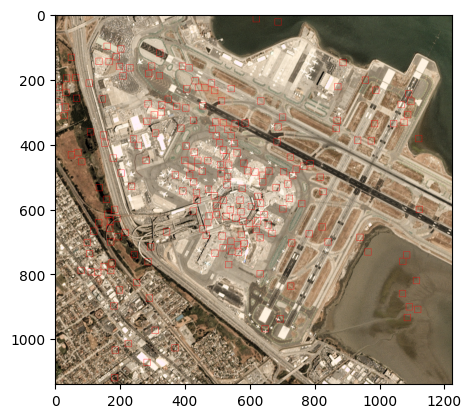

In [115]:
color = (255, 0, 0)
width = 1
for x,y in planeCoords:
    cv2.rectangle(img, (x, y), (x + 20, y + 20), color, width)

plt.imshow(img)